Question 1

In [35]:
#import pandas library and load CSV file
import pandas as pd
data=pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv", delimiter=",", encoding="UTF-8")
data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [36]:
#data type checking
data.dtypes

,0
Gender,object
Age,float64
Height,float64
Weight,float64
family_history_with_overweight,object
FAVC,object
FCVC,float64
NCP,float64
CAEC,object
SMOKE,object


In [37]:
#the data type is a DataFrame
type(data)

pandas.core.frame.DataFrame

In [38]:
#Checking for missing values
data.isnull().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


In [39]:
print("Valeurs uniques dans 'Gender' :", data["Gender"].unique())
print("Valeurs uniques dans 'SMOKE' :", data["SMOKE"].unique())
print("Valeurs uniques dans 'MTRANS' :", data["MTRANS"].unique())
print("Valeurs uniques dans 'NObeyesdad' :", data["NObeyesdad"].unique())

Valeurs uniques dans 'Gender' : ['Female' 'Male']
Valeurs uniques dans 'SMOKE' : ['no' 'yes']
Valeurs uniques dans 'MTRANS' : ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
Valeurs uniques dans 'NObeyesdad' : ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


Question 2

In [40]:
#Label encoding is used to convert categories into numeric values ​​in the case of two categories.
#One-hot encoding is used for categorical variables that have more than two categories.where the value is 1 if the observation belongs to this category, and 0 otherwise.

from sklearn.preprocessing import LabelEncoder
#Creating a LabelEncoder instance
label_encoder = LabelEncoder()
#Encoding the Gender and SMOKE variables
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['SMOKE'] = label_encoder.fit_transform(data['SMOKE'])
#This pandas function creates additional columns for each category in the specified columns
# (MTRANS and NObeyesdad). Each category is transformed into a binary column (0 or 1).
data = pd.get_dummies(data, columns=['MTRANS', 'NObeyesdad'], drop_first=True)


In [41]:
data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad_Normal_Weight,NObeyesdad_Obesity_Type_I,NObeyesdad_Obesity_Type_II,NObeyesdad_Obesity_Type_III,NObeyesdad_Overweight_Level_I,NObeyesdad_Overweight_Level_II
0,0,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,0,...,False,False,True,False,True,False,False,False,False,False
1,0,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,1,...,False,False,True,False,True,False,False,False,False,False
2,1,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,0,...,False,False,True,False,True,False,False,False,False,False
3,1,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,0,...,False,False,False,True,False,False,False,False,True,False
4,1,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,0,...,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,0,...,False,False,True,False,False,False,False,True,False,False
2107,0,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,0,...,False,False,True,False,False,False,False,True,False,False
2108,0,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,0,...,False,False,True,False,False,False,False,True,False,False
2109,0,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,0,...,False,False,True,False,False,False,False,True,False,False


In [42]:
mtrans_columns = data.filter(regex="^MTRANS_")
#the mtrans column lines are true and false, that's why we have to convert them to integers to get the values ​​0 and 1,
mtrans_columns = mtrans_columns.astype(int)
#deleting old columns to replace them with new integer type int
data = data.drop(columns=mtrans_columns.columns, errors='ignore')
data = data.join(mtrans_columns)


In [43]:
NObeyesdad_columns = data.filter(regex="^NObeyesdad_")
#the NObeyesdad_ column lines are true and false, that's why we have to convert them to integers to get the values ​​0 and 1,
NObeyesdad_columns = NObeyesdad_columns.astype(int)
#deleting old columns to replace them with new integer type int
data = data.drop(columns=NObeyesdad_columns.columns, errors='ignore')
data = data.join(NObeyesdad_columns)

In [44]:
data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad_Normal_Weight,NObeyesdad_Obesity_Type_I,NObeyesdad_Obesity_Type_II,NObeyesdad_Obesity_Type_III,NObeyesdad_Overweight_Level_I,NObeyesdad_Overweight_Level_II
0,0,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,0,...,0,0,1,0,1,0,0,0,0,0
1,0,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,1,...,0,0,1,0,1,0,0,0,0,0
2,1,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,0,...,0,0,1,0,1,0,0,0,0,0
3,1,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,0,...,0,0,0,1,0,0,0,0,1,0
4,1,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,0,...,0,0,1,0,0,0,0,1,0,0
2107,0,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,0,...,0,0,1,0,0,0,0,1,0,0
2108,0,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,0,...,0,0,1,0,0,0,0,1,0,0
2109,0,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,0,...,0,0,1,0,0,0,0,1,0,0


Question 3

In [45]:
data.dtypes

,0
Gender,int64
Age,float64
Height,float64
Weight,float64
family_history_with_overweight,object
FAVC,object
FCVC,float64
NCP,float64
CAEC,object
SMOKE,int64


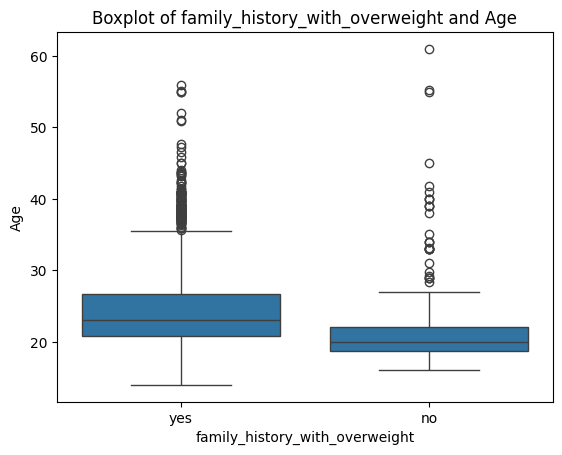

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x="family_history_with_overweight", y="Age", data=data)

#Detecting outliers using boxplots for the age variable
#These outliers are found above the upper bound, there are many
plt.title("Boxplot of family_history_with_overweight and Age")
plt.show()

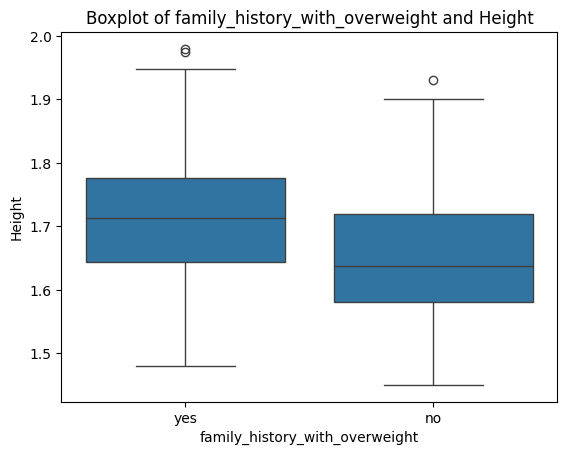

In [47]:

sns.boxplot(x="family_history_with_overweight", y="Height", data=data)
# There are a few outliers
plt.title("Boxplot of family_history_with_overweight and Height")
plt.show()

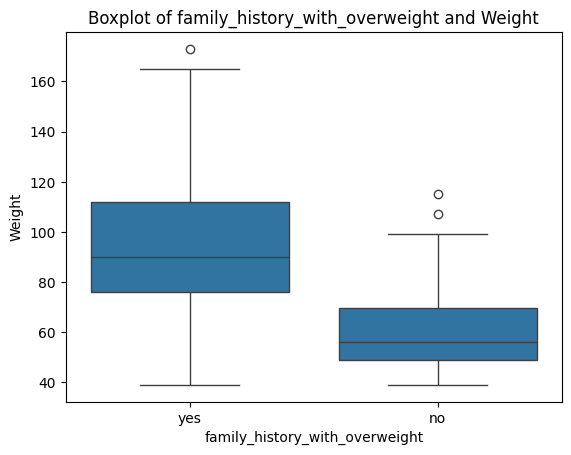

In [48]:

sns.boxplot(x="family_history_with_overweight", y="Weight", data=data)

# 3 outliers
plt.title("Boxplot of family_history_with_overweight and Weight")
plt.show()

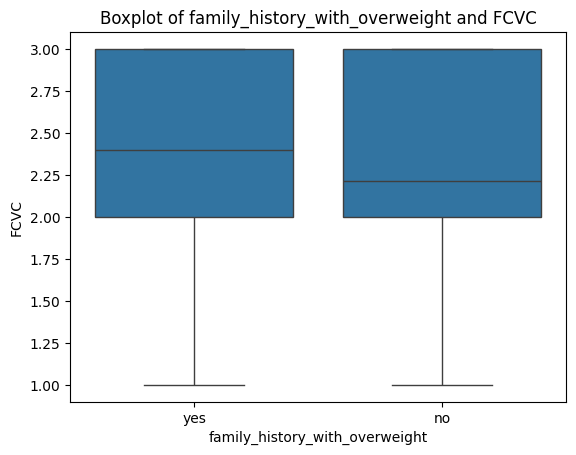

In [49]:

sns.boxplot(x="family_history_with_overweight", y="FCVC", data=data)

#no outliers
plt.title("Boxplot of family_history_with_overweight and FCVC")
plt.show()

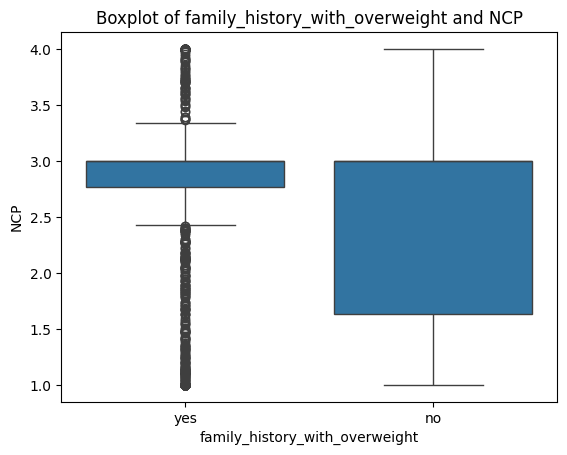

In [50]:

sns.boxplot(x="family_history_with_overweight", y="NCP", data=data)

# in case of family_history_with_overweight is yes, we get several outliers
# which are found above upper bound and below lower bound
plt.title("Boxplot of family_history_with_overweight and NCP")
plt.show()

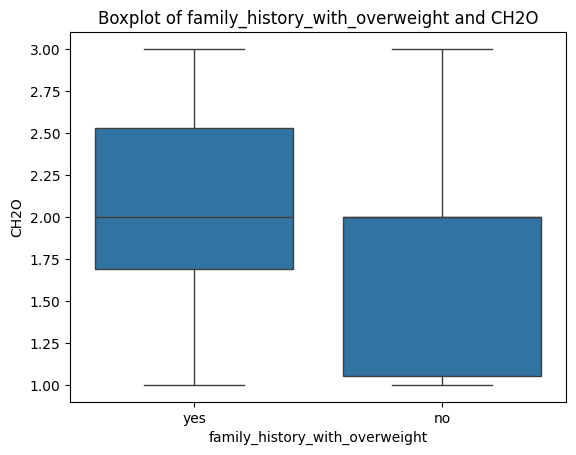

In [51]:
sns.boxplot(x="family_history_with_overweight", y="CH2O", data=data)

# no outliers
plt.title("Boxplot of family_history_with_overweight and CH2O")
plt.show()

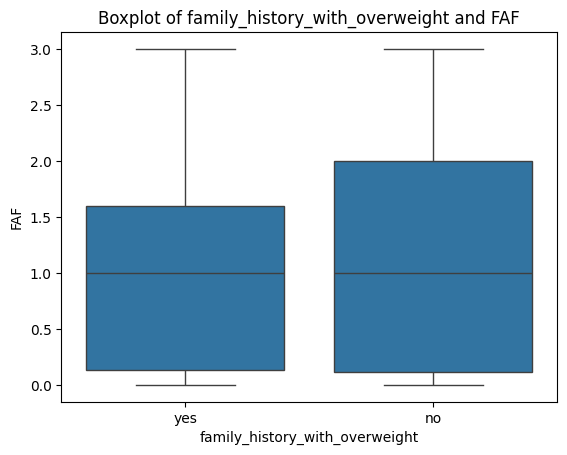

In [52]:

sns.boxplot(x="family_history_with_overweight", y="FAF", data=data)

# no outliers
plt.title("Boxplot of family_history_with_overweight and FAF")
plt.show()

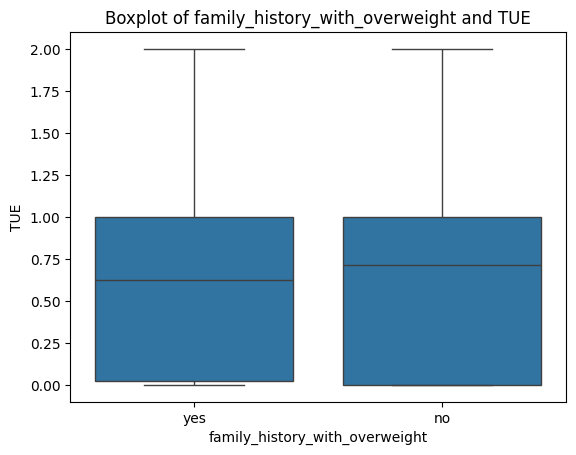

In [53]:

sns.boxplot(x="family_history_with_overweight", y="TUE", data=data)

# no outliers
plt.title("Boxplot of family_history_with_overweight and TUE")
plt.show()

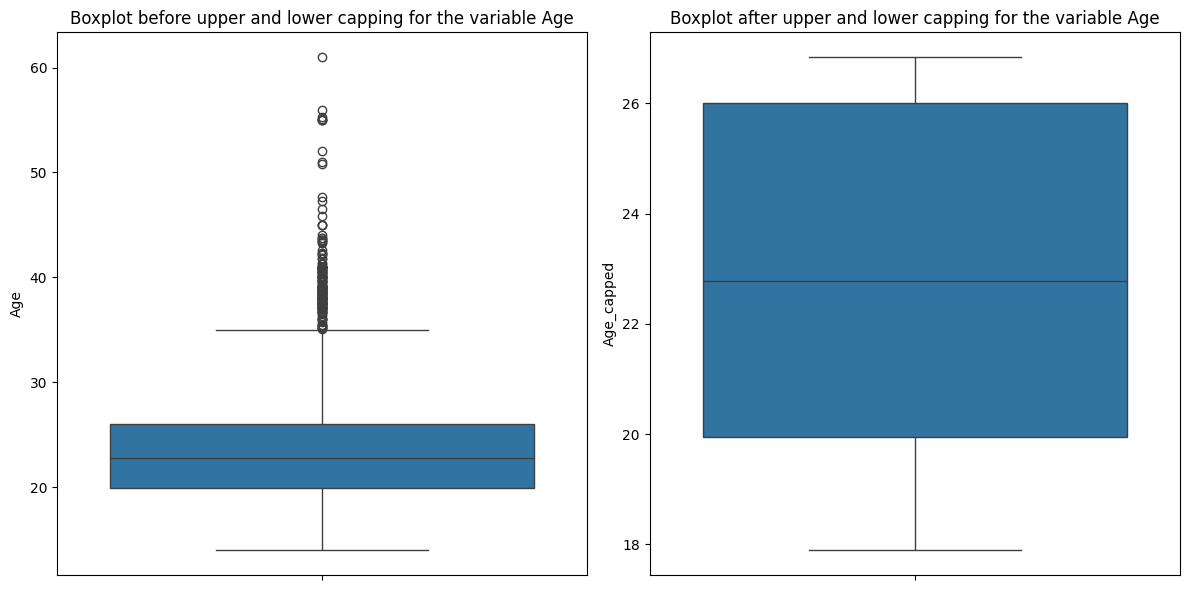

In [54]:
#Capping for the variable Age, I tried to identify the threshold above 95%, but the outliers are still present, that's why the percentage must be reduced to 78%
import numpy as np

# Determine the capping threshold
upper_seuil = data['Age'].quantile(0.78)  #  upper threshold 78%
lower_seuil = data['Age'].quantile(0.05)  #  lower threshold à 5%

# Apply the capping upper and lower
data['Age_capped'] = data['Age'].clip(lower=lower_seuil, upper=upper_seuil)

# Reset index for boxplot
data.reset_index(inplace=True)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Boxplot before capping
sns.boxplot(y='Age', data=data, ax=axes[0])
axes[0].set_title("Boxplot before upper and lower capping for the variable Age")

# Boxplot after capping
sns.boxplot(y='Age_capped', data=data, ax=axes[1])
axes[1].set_title("Boxplot after upper and lower capping for the variable Age")


plt.tight_layout()
plt.show()

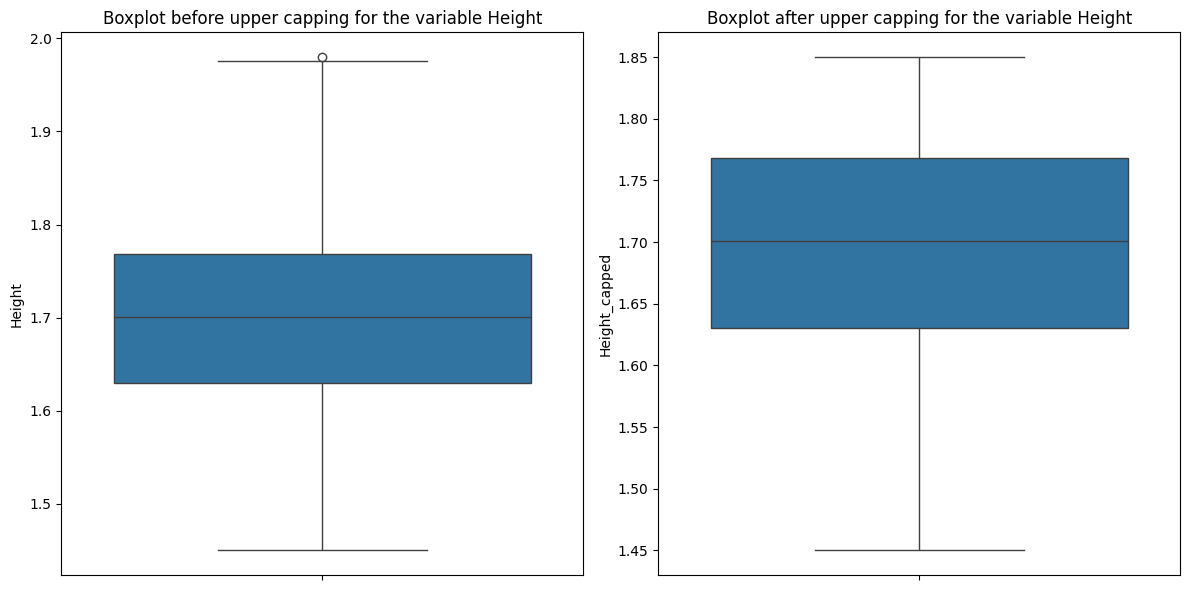

In [55]:
#Capping for the variable Height

# Determine the capping threshold
seuil = data['Height'].quantile(0.95)

# Apply the capping
data['Height_capped'] = data['Height'].clip(upper=seuil)

# Reset index for boxplot
data.reset_index(inplace=True)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Boxplot before capping
sns.boxplot(y='Height', data=data, ax=axes[0])
axes[0].set_title("Boxplot before upper capping for the variable Height")

# Boxplot after capping
sns.boxplot(y='Height_capped', data=data, ax=axes[1])
axes[1].set_title("Boxplot after upper capping for the variable Height")


plt.tight_layout()
plt.show()


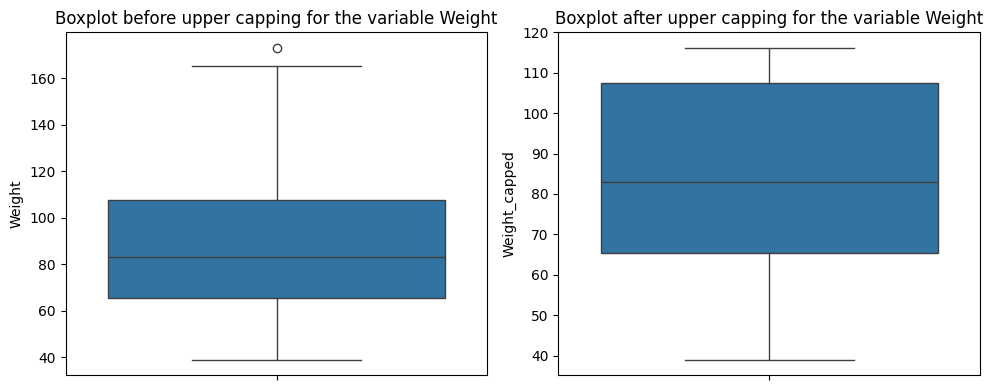

In [56]:
seuil = data['Weight'].quantile(0.85)

# Apply the capping
data['Weight_capped'] = data['Weight'].clip(upper=seuil)

# Reset index for boxplot
data.reset_index(drop=True,inplace=True)

# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Boxplot before capping
sns.boxplot(y='Weight', data=data, ax=axes[0])
axes[0].set_title("Boxplot before upper capping for the variable Weight")

# Boxplot after capping
sns.boxplot(y='Weight_capped', data=data, ax=axes[1])
axes[1].set_title("Boxplot after upper capping for the variable Weight")

plt.tight_layout()
plt.show()

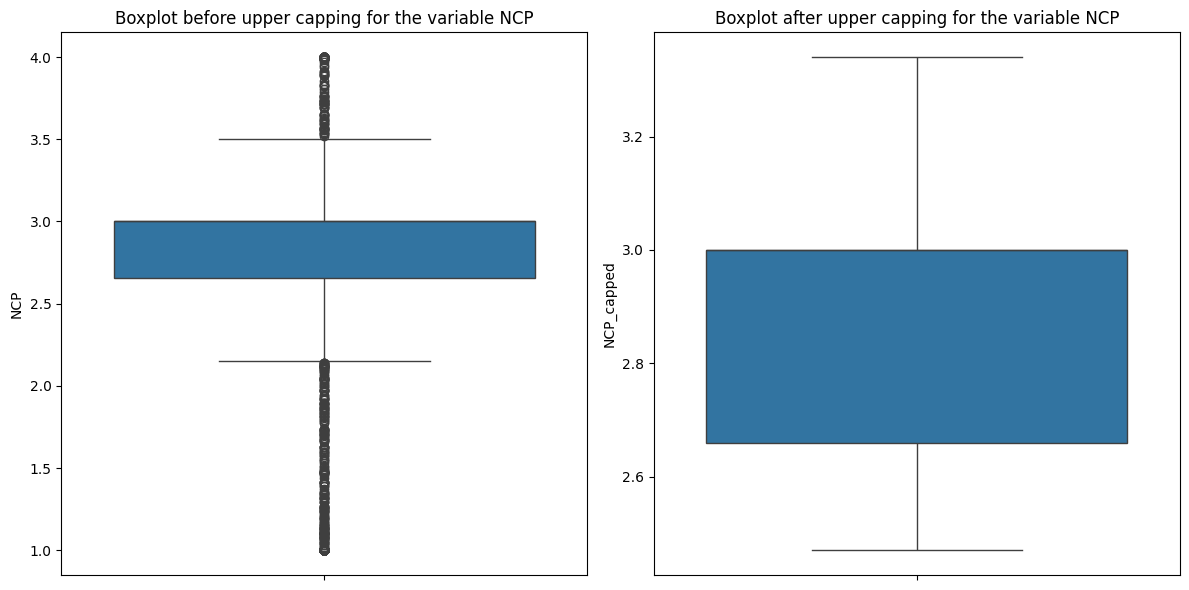

In [57]:
#Capping for the variable NCP

upper_seuil = data['NCP'].quantile(0.92)
lower_seuil = data['NCP'].quantile(0.23)

# Apply the capping upper and lower
data['NCP_capped'] = data['NCP'].clip(lower=lower_seuil, upper=upper_seuil)

# Reset index for boxplot
data.reset_index(drop=True,inplace=True)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Boxplot before capping
sns.boxplot(y='NCP', data=data, ax=axes[0])
axes[0].set_title("Boxplot before upper capping for the variable NCP")

# Boxplot after capping
sns.boxplot(y='NCP_capped', data=data, ax=axes[1])
axes[1].set_title("Boxplot after upper capping for the variable NCP")


plt.tight_layout()
plt.show()


Question 4

In [58]:
data.drop(['level_0', 'index'], axis=1, inplace=True)
data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,NObeyesdad_Normal_Weight,NObeyesdad_Obesity_Type_I,NObeyesdad_Obesity_Type_II,NObeyesdad_Obesity_Type_III,NObeyesdad_Overweight_Level_I,NObeyesdad_Overweight_Level_II,Age_capped,Height_capped,Weight_capped,NCP_capped
0,0,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,0,...,1,0,0,0,0,0,21.000000,1.620000,64.00000,3.000000
1,0,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,1,...,1,0,0,0,0,0,21.000000,1.520000,56.00000,3.000000
2,1,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,0,...,1,0,0,0,0,0,23.000000,1.800000,77.00000,3.000000
3,1,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,0,...,0,0,0,0,1,0,26.841242,1.800000,87.00000,3.000000
4,1,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,0,...,0,0,0,0,0,1,22.000000,1.780000,89.80000,2.470068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,0,...,0,0,0,1,0,0,20.976842,1.710730,116.16234,3.000000
2107,0,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,0,...,0,0,0,1,0,0,21.982942,1.748584,116.16234,3.000000
2108,0,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,0,...,0,0,0,1,0,0,22.524036,1.752206,116.16234,3.000000
2109,0,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,0,...,0,0,0,1,0,0,24.361936,1.739450,116.16234,3.000000


In [59]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Apply Min-Max scaling for the following columns
data['Age'] = scaler.fit_transform(data[['Age_capped']])
data['Height'] = scaler.fit_transform(data[['Height_capped']])
data['Weight'] = scaler.fit_transform(data[['Weight_capped']])
data['NCP'] = scaler.fit_transform(data[['NCP_capped']])
data['FCVC'] = scaler.fit_transform(data[['FCVC']])
data['NCP'] = scaler.fit_transform(data[['NCP']])
data['CH2O'] = scaler.fit_transform(data[['CH2O']])
data['FAF'] = scaler.fit_transform(data[['FAF']])
data['TUE'] = scaler.fit_transform(data[['TUE']])
# remove capped columns
data.drop(['Age_capped', 'Height_capped', 'Weight_capped','NCP_capped'], axis=1, inplace=True)
data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad_Normal_Weight,NObeyesdad_Obesity_Type_I,NObeyesdad_Obesity_Type_II,NObeyesdad_Obesity_Type_III,NObeyesdad_Overweight_Level_I,NObeyesdad_Overweight_Level_II
0,0,0.347334,0.425000,0.323992,yes,no,0.5,0.608968,Sometimes,0,...,0,0,1,0,1,0,0,0,0,0
1,0,0.347334,0.175000,0.220315,yes,no,1.0,0.608968,Sometimes,1,...,0,0,1,0,1,0,0,0,0,0
2,1,0.570802,0.875000,0.492468,yes,no,0.5,0.608968,Sometimes,0,...,0,0,1,0,1,0,0,0,0,0
3,1,1.000000,0.875000,0.622065,no,no,1.0,0.608968,Sometimes,0,...,0,0,0,1,0,0,0,0,1,0
4,1,0.459068,0.825000,0.658352,no,no,0.5,0.000000,Sometimes,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,0.344746,0.651825,1.000000,yes,yes,1.0,0.608968,Sometimes,0,...,0,0,1,0,0,0,0,1,0,0
2107,0,0.457162,0.746460,1.000000,yes,yes,1.0,0.608968,Sometimes,0,...,0,0,1,0,0,0,0,1,0,0
2108,0,0.517621,0.755515,1.000000,yes,yes,1.0,0.608968,Sometimes,0,...,0,0,1,0,0,0,0,1,0,0
2109,0,0.722977,0.723625,1.000000,yes,yes,1.0,0.608968,Sometimes,0,...,0,0,1,0,0,0,0,1,0,0


Week 2:
Question 1

In [60]:
#Show statistical summary of numeric columns in dataframe
data.describe()

,Gender,Age,Height,Weight,FCVC,NCP,SMOKE,CH2O,FAF,TUE,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad_Normal_Weight,NObeyesdad_Obesity_Type_I,NObeyesdad_Obesity_Type_II,NObeyesdad_Obesity_Type_III,NObeyesdad_Overweight_Level_I,NObeyesdad_Overweight_Level_II
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,0.505921,0.542093,0.625237,0.593551,0.709522,0.485495,0.020843,0.504006,0.336766,0.328933,0.003316,0.005211,0.748460,0.026528,0.135955,0.166272,0.140692,0.153482,0.137376,0.137376
std,0.500083,0.361344,0.225625,0.301140,0.266963,0.302049,0.142893,0.306477,0.283531,0.304464,0.057502,0.072015,0.434001,0.160737,0.342821,0.372413,0.347786,0.360537,0.344325,0.344325
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.229699,0.450000,0.343086,0.500000,0.216809,0.000000,0.292406,0.041502,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.545985,0.626247,0.570226,0.692751,0.608968,0.000000,0.500000,0.333333,0.312675,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.906005,0.796160,0.886840,1.000000,0.608968,0.000000,0.738710,0.555559,0.500000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


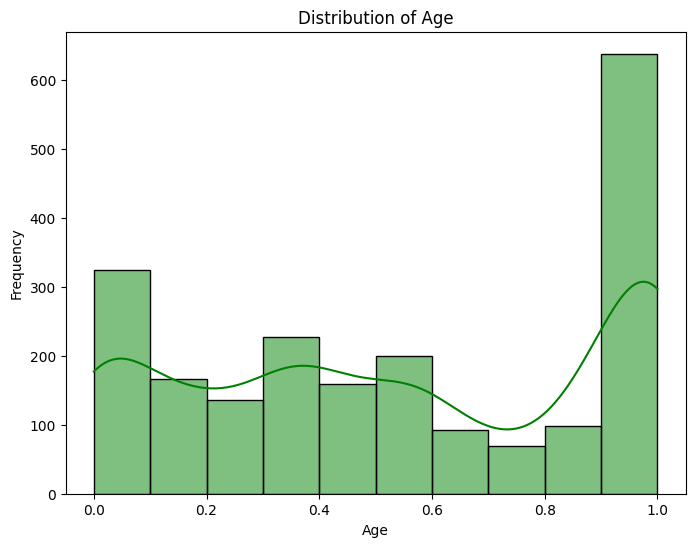

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram with KDE plot for the variable 'age'
plt.figure(figsize=(8, 6))

#Plotting Histogram with KDE
sns.histplot(data['Age'], kde=True, bins=10, color='green')

# Title and labels
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Show graph
plt.show()
#A large proportion of people in the data have a very low age (relative to the scale after normalization) around 0. There is also a strong concentration of individuals in the highest age group around 1
# *The distribution represented in the histogram is asymmetrical.
#The distribution is also multimodal

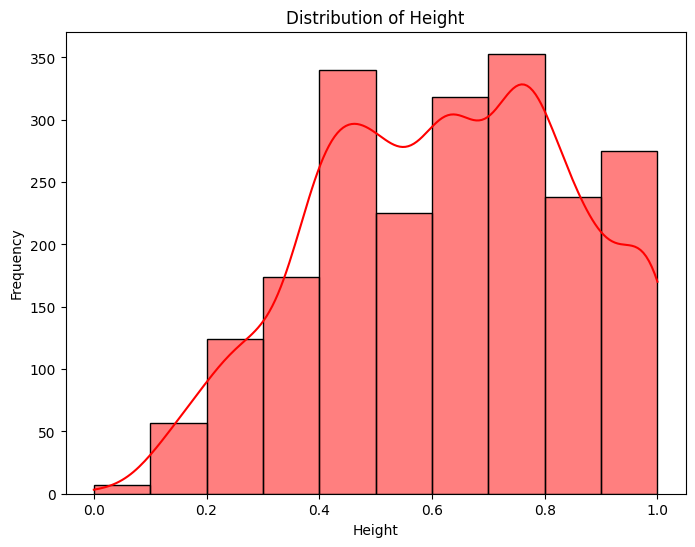

In [62]:
#Histogram with KDE plot for the variable 'height'
plt.figure(figsize=(8, 6))

# Plotting Histogram with KDE
sns.histplot(data['Height'], kde=True, bins=10, color='red')

# Title and labels
plt.title('Distribution of Height')
plt.xlabel('Height')
plt.ylabel('Frequency')

# Show graph
plt.show()

# *The distribution represented in the histogram is asymmetrical.
#The distribution is also multimodal.


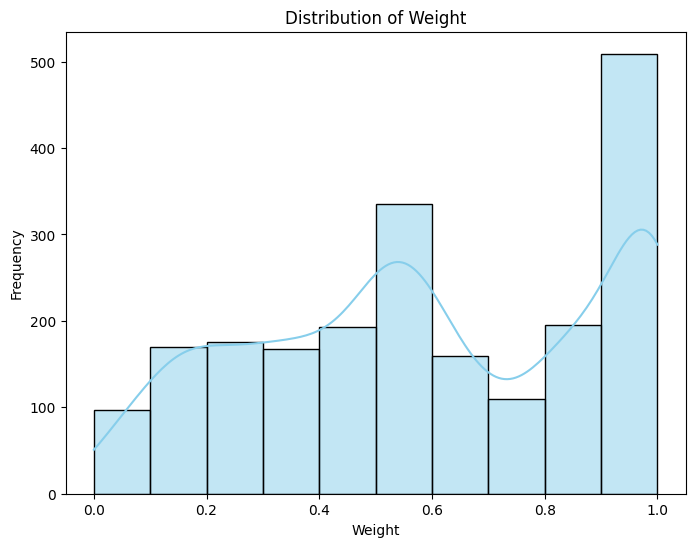

In [63]:
#Histogram with KDE plot for the variable 'weight'
plt.figure(figsize=(8, 6))

# Plotting Histogram with KDE
sns.histplot(data['Weight'], kde=True, bins=10,  color='skyblue')
# Title and labels
plt.title('Distribution of Weight')
plt.xlabel('Weight')
plt.ylabel('Frequency')

# Show graph
plt.show()
#We observe a main peak around 0.4, followed by a sharp decline, and then another smaller peak around 0.7. This indicates an asymmetrical distribution.
#The distribution is also multimodal.

Question 3

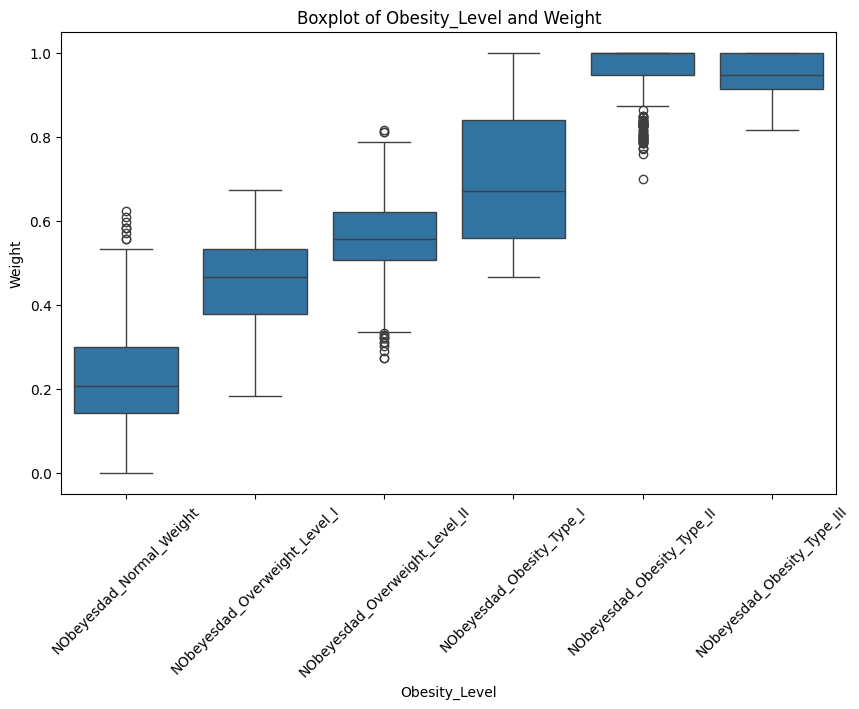

In [64]:

#Merge the obesity columns into a single categorical column
data['Obesity_Level'] = data[['NObeyesdad_Normal_Weight', 'NObeyesdad_Obesity_Type_I', 'NObeyesdad_Obesity_Type_II', 'NObeyesdad_Obesity_Type_III', 'NObeyesdad_Overweight_Level_I', 'NObeyesdad_Overweight_Level_II']].idxmax(axis=1)

# Create a boxplot to explore the relationship between Weight and obesity levels.
plt.figure(figsize=(10,6))
sns.boxplot(x='Obesity_Level', y='Weight', data=data)
plt.title("Boxplot of Obesity_Level and Weight")
plt.xticks(rotation=45)
plt.show()

#It makes sense that we found different outliers when analyzing the obesity and weight variables, even after managing the outliers in our initial analysis. Each variable may have its own characteristics, and it is important to assess each combination of variables independently to understand how outliers manifest in each context


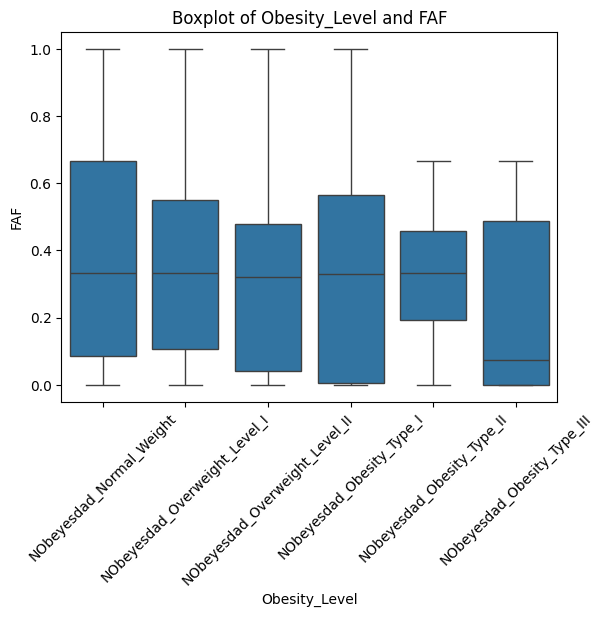

In [65]:
#Create a boxplot to explore the relationship between FAF and obesity levels.
sns.boxplot(x="Obesity_Level", y="FAF", data=data)

# no outliers
plt.title("Boxplot of Obesity_Level and FAF")
plt.xticks(rotation=45)
plt.show()

Question 4

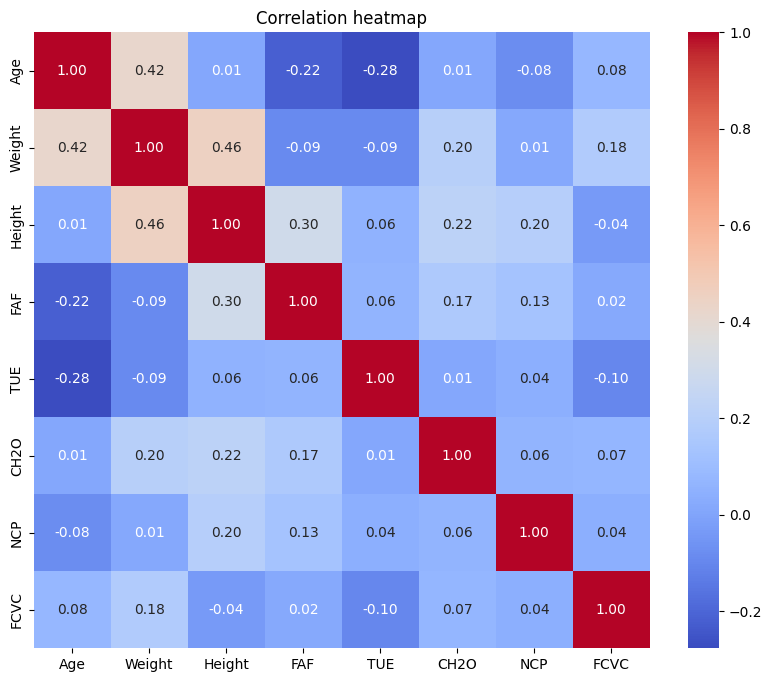

In [66]:

# Select only continuous columns
features = data[['Age', 'Weight', 'Height', 'FAF','TUE','CH2O','NCP','FCVC']]  # Assurez-vous d'inclure les bonnes colonnes

# Calculate the correlation matrix
correlation_matrix = features.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation heatmap')
plt.show()


In [67]:
# save data
data.to_csv('data_cleaning.csv', sep=',', index=False)
